In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [3]:
a_ch_dw = pd.read_csv('./magazine/final/a_ch_dw.csv', sep = '|', encoding = 'utf-8')
b_ch_dw = pd.read_csv('./magazine/final/b_ch_dw.csv', sep = '|', encoding = 'utf-8')
c_ch_dw = pd.read_csv('./magazine/final/c_ch_dw.csv', sep = '|', encoding = 'utf-8')
e_ch_dw = pd.read_csv('./magazine/final/e_ch_dw.csv', sep = '|', encoding = 'utf-8')
fb_ch_dw = pd.read_csv('./magazine/final/fb_ch_dw.csv', sep = '|', encoding = 'utf-8')
fn_ch_dw = pd.read_csv('./magazine/final/fn_ch_dw.csv', sep = '|', encoding = 'utf-8')
m_ch_dw = pd.read_csv('./magazine/final/m_ch_dw.csv', sep = '|', encoding = 'utf-8')
v_ch_dw = pd.read_csv('./magazine/final/v_ch_dw.csv', sep = '|', encoding = 'utf-8')
w_ch_dw = pd.read_csv('./magazine/final/w_ch_dw.csv', sep = '|', encoding = 'utf-8')

In [163]:
ch_dw = pd.concat([a_ch_dw, b_ch_dw, c_ch_dw, e_ch_dw, fb_ch_dw, fn_ch_dw, m_ch_dw, v_ch_dw, w_ch_dw])

NameError: name 'a_ch_dw' is not defined

In [359]:
ch_dw.reset_index(drop=True, inplace = True)

In [366]:
len(ch_dw)

1450

In [361]:
ch_dw = ch_dw[['magazine', 'brand', 'category', 'title', 'link', 'date', 'contents',
       'title_brand', 'check', 'why', 'word_chanel']]

In [362]:
for i in range(len(ch_dw)):
    if not '샤넬' in ch_dw.loc[i, 'contents']:
        ch_dw.loc[i, 'check'] = 2

In [363]:
def drop_2(df):
    return df[df['check'] != 2]

In [364]:
ch_dw = drop_2(ch_dw)

# 전처리

### 기호 삭제

In [367]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('[', '').str.replace(']', '').str.replace('\\', '').str.replace('"', '').str.replace("'", "").str.replace('「', '').str.replace('」', '').str.replace('”', '').str.replace('‘', '').str.replace('“', '')

## 브랜드 및 디자이너 이름 대체

### 에디 슬리먼, 에디 슬리만 -> 'HEDI-SLIMANE'으로 변경
에디슬리먼, 에디슬리만, 에디 슬리먼, 에디 슬리만

In [368]:
for word in ch_dw['word_chanel']:
    if 'Hedi' in word:
        print(word)
        print('-'*50)

In [369]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('에디슬리먼', '에디-슬리먼').str.replace('에디 슬리먼', '에디-슬리먼').str.replace('에디슬리만', '에디-슬리먼').str.replace('에디 슬리만', '에디-슬리먼')

In [370]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('에디-슬리먼', 'HEDI-SLIMANE')

In [371]:
'Hedi Slimane'.upper()

'HEDI SLIMANE'

In [372]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('Hedi Slimane', 'HEDI-SLIMANE')

### 칼 라거펠드, 칼 라거펠트 -> KARL-LAGERFELD

In [373]:
for word in ch_dw['word_chanel']:
    if '칼은' in word:
        print(word)
        print('-'*50)

샤넬과 펜디를 이끌어 가던 역사적 인물 KARL-LAGERFELD는 85세의 나이로 별세했다. 혼자 살던 그는 반려묘 슈페트’(Choupette)와 함께 살았기에 생전 그는 슈페트를 아끼고 사랑하는 모습을 여과 없이 보여줬다. 슈페트는 귀엽고 우아한 생김새로 각종 촬영의 모델로 등장해 이미 패션계 유명한 고양이일 뿐 아니라, 칼은 슈페트를 모티브 삼은 패션 아이템도 출시하곤 했었다. 게다가 슈페트를 담당하는 전담 경호원 2명과 집사의 보호과 관리 아래 단언컨대 지상 최고의 반려묘 생활을 누렸다. 그가 떠나고 남겨진 슈페트에 관한 가장 뜨거운 이슈는 바로 재산상속. 2천2백억 원 이상으로 추정되는 칼의 재산은 슈페트에게 돌아갈 수 있을까?
--------------------------------------------------
 세계적인 톱모델 신현지, <바자>의 커버걸이 되다,  BYBAZAAR2020.10.16,  패션 매거진 〈바자〉는 11월호의 커버를 공개했다. 지난 봄, 프랑스 파리에서 열렸던 2020 F/W 샤넬 컬렉션의 피날레에 서며 아시아 최초의 클로징 모델로 화제를 모았던 톱모델 신현지가 그 주인공. ,  하퍼스 바자 코리아 Harper’s BAZAAR 제공,  KARL-LAGERFELD 시절부터 현재 샤넬을 이끄는 디자이너 VIRGINIE-VIARD까지 샤넬 하우스와 특별한 인연을 이어가고 있는 세계적인 모델이다. 그녀는 새롭게 공개된 2020 크루즈 컬렉션을 입고 커버걸로 등장했다.,  하퍼스 바자 코리아 Harper’s BAZAAR 제공,  하퍼스 바자 코리아 Harper’s BAZAAR 제공,  칼은 상상력과 창의력으로 넘쳐나는, 압도적인 무대를 선보였다면 VIRGINIE-VIARD가 이끄는 지금의 샤넬 하우스는 동시대 여성들이 딱 원하고 필요로 하는 스타일을 선보이죠. 고등학교 시절부터 모델로 활동해온 그녀는 이번 바자 커버 촬영을 통해 성숙하고도 카리스마 넘치는 모습을 보여주었다. 디지털이 아닌 필름과 폴라로이드로만 촬영한 빈티지한 

In [374]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('칼 라거펠드', 'KARL-LAGERFELD').str.replace('칼 라거펠트', 'KARL-LAGERFELD')

In [375]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('칼 라거 펠트', 'KARL-LAGERFELD').str.replace('칼 라거필드', 'KARL-LAGERFELD')

In [376]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('칼라거펠트', 'KARL-LAGERFELD')

In [377]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('라거펠트', 'KARL-LAGERFELD').str.replace('라거펠드', 'KARL-LAGERFELD')

In [378]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('칼 러거펠트', 'KARL-LAGERFELD').str.replace('칼 라가펠드', 'KARL-LAGERFELD').str.replace('칼 라커펠드', 'KARL-LAGERFELD')

In [379]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('칼 라커펠트', 'KARL-LAGERFELD')

In [380]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('칼 라게펠트', 'KARL-LAGERFELD').str.replace('칼 라가펠트', 'KARL-LAGERFELD')

In [381]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('칼 카거펠트', 'KARL-LAGERFELD')

### 버지니 비아르 -> VIRGINIE VIARD

In [382]:
'Virginie Viard'.upper()

'VIRGINIE VIARD'

In [383]:
for word in ch_dw['word_chanel']:
    if '버지니' in word:
        print(word)
        print('-'*50)

In [384]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('버지니 비아르', 'VIRGINIE-VIARD').str.replace('버니지 비아르', 'VIRGINIE-VIARD')

In [385]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('버지니 비아드', 'VIRGINIE-VIARD')

In [386]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('버지니 비아니', 'VIRGINIE-VIARD')

In [387]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('버지니 비아', 'VIRGINIE-VIARD')

In [388]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('버지니비아르', 'VIRGINIE-VIARD')

In [389]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('비르지니 비아르', 'VIRGINIE-VIARD').str.replace('버지니아 비아르', 'VIRGINIE-VIARD').str.replace('비르자니 비아르', 'VIRGINIE-VIARD')

In [390]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('비아르', 'VIARD')

In [391]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('버지니 바이르', 'VIRGINIE-VIARD')

In [392]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('버지니', 'VIRGINIE-VIARD')

### 샤넬 -> CHANEL

In [393]:
for word in ch_dw['word_chanel']:
    if '가브리엘' in word:
        print(word)
        print('-'*50)

당장 인스타그램을 열어 패션 에디터, 디자이너, 인플루언서의 계정을 열어보길. 지금 막 시작된 가을/겨울 신상품과 함께 족히 20년은 되어 보이는 가방과 액세서리가 심심치 않게 보인다. 패션 콘텐츠를 선보이는 플랫폼도 앞다투어 빈티지 스타일링을 다룬다. 아아, 저것은 2008년의 컬렉션! 이것은 2010년 한정판으로 나온 것이고 모델은 누구였다까지 떠오르는 나는 어쩌면 패션계의 고인물일지도 모르겠다. 개인적 반가움은 미뤄두더라도 이 옷과 액세서리들은 여전히 아름답다. 처음의 볼록볼록함을 잃고 다소 납작해진 샤넬 클래식 백에 대해서 여러분은 어떻게 생각하나? 그저 낡은 백인가? 내가 보기에는 한창때는 지났지만 한결 너그럽고 우아해진 여사님처럼 보이고, 데님 팬츠와 스웨터로 된 평범한 룩에 우아함 한 방울을 드리우는 것 같다. 드라마 <하이에나>에서 변호사 역을 맡은 김혜수는 빈티지 가방을 여럿 들었다. 처음의 빳빳함을 잃고 중력에 따라 느슨하게 처진 에르메스의 에르백이나, 더 이상 나오지 않는 샤넬의 브리프케이스… 이런 소품들은 경력과 능력을 갖춘 정금자 역할에 리얼리티를 부여했다., 오랜만에 처박아둔 박스’를 뒤져 루이 비통의 백팩을 찾아냈다. 몽수리라는 귀여운 이름의 백팩은 포코노 소재로 된 프라다 백팩의 후계자였다. 한때 백팩을 한쪽으로 메고 압구정동을 걸으면 나와 같은 백팩을 멘 여성을 대여섯 명은 만날 수 있었다. 근 10년만에 세상의 빛을 본 백팩은 조금 얼룩덜룩하긴 했지만 여전히 튼튼했다. 스웨터를 입고 이 백팩을 멨다. 이 백팩을 멘 건 나 하나다. 이제 나의 빈티지 몽수리 백팩이 샤넬 가브리엘 백팩보다 귀하다. 디자인이 변형되어 기존 디자인은 시간과 함께 어느덧 레어템’이 되어 있었다., 그러니 빈티지 패션은, 어쩌면 나도 좋고 너도 좋은 일이다. 당시 사랑했던, 지금 사랑하지 않는 나의 물건들이 새로운 사랑을 받는 것도 좋은 일이다. 그래서 요즘은 빈티지 물건에 대해 중고임을 뜻하는 Used’보다 소장된(Pre-Owned)’을 사용하거나, 사랑

In [394]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('샤넬', 'CHANEL').str.replace('Chanel', 'CHANEL').str.replace('chanel', 'CHANEL')

### 크리스챤 디올, 디올, 디오르 -> DIOR

In [395]:
for word in ch_dw['word_chanel']:
    if 'dior' in word:
        print(word)
        print('-'*50)

슬로건 티셔츠를 두고 누군가는 꿩 먹고 알 먹고’, 누이 좋고 매부 좋다’라고 했다. 메시지도 전하며 상업적인 성공도 거머쥘 수 있는 효자 아이템이기 때문이다. 사람들은 베트멍의 60만원대 슬로건 후드와 90만원대의 구찌 로고 티셔츠를 사기 위해 기꺼이 지갑을 연다. 그것과 매우 유사한 1만9천원짜리 티셔츠를 살 수 있음에도 불구하고 뎀나 바잘리아가 인용한 문구에, 단순하지만 신기하리만큼 룩을 럭셔리하게 만드는 구찌의 로고 티셔츠 구입에 돈을 아끼지 않는다. 브랜드의 로고가 박힌 흰 티셔츠는 가장 적은 돈으로 그 브랜드의 옷을 입을 수 있는 기회이지만, 브랜드의 입장에서도 소비자의 입장에서도 이는 비합리적인 태도가 아닐 수 없다. 누구나 카피할 수 있는 옷을 만드는 쪽도, 보통 면 티셔츠 값보다 수십 배나 비싼 그 옷을 사는 쪽도 말이다. 하지만 글자가 지닌 힘을, 로고가 지닌 아우라를 간과해서는 안 된다. 캘빈 클라인으로 거처를 옮긴 라프 시몬스는 컬렉션을 선보이기 직전에 아트 디렉터 피터 새빌과 함께 만든 새 로고를 선보였다. CALVIN KLEIN 205 W39 NYC’! 이는 캘빈 클라인의 초심으로 돌아가고자 한 라프 시몬스의 의지를 담았다. 마리아 그라치아 치우리가 디올에서 J’adior’를 반복한 패턴의 끈으로 슈즈와 드레스를 만들고 새로운 서체의 Dior’을 장식한 가방과 반지를 만든 것은 브랜드의 로고가 지닌 막강한 힘을 의식했기 때문이다. 이는 내가 여기 있노라, 그리고 바꾸노라를 명명하는 의식. 세린느(Celine)를 맡은 직후 첫 번째 E에 악상테귀를 찍은 피비 파일로와 입생로랑의 심장과도 같았던 Yves’를 과감하게 도려낸 HEDI-SLIMANE처럼. 로고를 입는다는 것은 브랜드의 철학을, 디자이너 크리에이티브의 정수를 입는 것이나 다름없다. 디자이너의 세대교체와 맞물려 이루어진 로고 교체를 홍보하는 수단이 된 로고 티셔츠의 유행은 스트리트 컬처와 만나 그야말로 유행의 꽃을 피웠다. 바야흐로 90년대의 추억이 뭉글뭉글 피어오를 즈음이었다.

In [396]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('크리스찬 디올', 'DIOR').str.replace('크리스챤 디올', 'DIOR').str.replace('크리스찬디오르', 'DIOR')

In [397]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('디오르', 'DIOR').str.replace('디올', 'DIOR')

In [398]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('Dior', 'DIOR')

### Maria Grazia Chiuri -> MARIA-GRAZIA-CHIURI

In [399]:
'Maria Grazia Chiuri'.upper()

'MARIA GRAZIA CHIURI'

In [400]:
for word in ch_dw['word_chanel']:
    if '마리아' in word:
        print(word)
        print('-'*50)

피비 파일로라는 이름은 여자에게도 특별한 여자를 상징한다. 그녀는 자신의 정치사회적 신념을 드러내거나 삶에 대해 계몽적인 제스처를 취한 적이 없고 유명세에 비해 사생활도 거의 알려져 있지 않다. DIOR의 크리에이티브 디렉터 마리아 그라치아 치우리의 우리는 모두 페미니스트가 되어야 한다(We Should All Be Feminists)’고 쓰인 슬로건 티셔츠처럼 직접적으로 여성성을 쟁점으로 소환하거나, 멀게는 미우치아 프라다처럼 확고한 정치적 신념을 가지고(정치 전공자인 데다 60년대 말 여자 공산주의자 시위 현장에 드레스를 입고 참가한 멋쟁이로 유명하다!) 기성 세대의 질서를 교란시키는 대담하고 실용적인 스타일로 여성성을 선동하지도 않는다. 더 멀게는 GABRIELLE CHANEL처럼 옷, 슈즈, 액세서리 하나하나에 여성 해방이라는 거창한 수식을 붙인 적도 없다. 피비 파일로의 이미지는 요즘 유행하는 걸 크러시’와는 거리가 멀지만 그럼에도 불구하고 그녀가 선보이는 컬렉션과 이를 보충하는 말 한마디가 현대 패션과 여성에게 강한 울림을 갖게 된 건, 자신을 특별하게 포장하지 않고 현실을 사는 보통의 여자로 표현하는 그녀만의 비범한 평범함에서 온다. 그 예로 과거 승승장구하던 끌로에를 뒤로하고 패션계를 홀연히 떠난 그녀가 남긴 육아에 집중하고 싶다’는 말은 패션계의 전설이 되었다.
--------------------------------------------------
슬로건 티셔츠를 두고 누군가는 꿩 먹고 알 먹고’, 누이 좋고 매부 좋다’라고 했다. 메시지도 전하며 상업적인 성공도 거머쥘 수 있는 효자 아이템이기 때문이다. 사람들은 베트멍의 60만원대 슬로건 후드와 90만원대의 구찌 로고 티셔츠를 사기 위해 기꺼이 지갑을 연다. 그것과 매우 유사한 1만9천원짜리 티셔츠를 살 수 있음에도 불구하고 뎀나 바잘리아가 인용한 문구에, 단순하지만 신기하리만큼 룩을 럭셔리하게 만드는 구찌의 로고 티셔츠 구입에 돈을 아끼지 않는다. 브랜드의 로고가 박힌 흰 티셔츠는 가장

In [401]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('마리아 그라치아 치우리', 'MARIA-GRAZIA-CHIURI')

In [402]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('마리아 그라지아 치우리', 'MARIA-GRAZIA-CHIURI')

In [403]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('마리아 그라치아 키우리', 'MARIA-GRAZIA-CHIURI')

In [404]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('마리아 그라치아 치루이', 'MARIA-GRAZIA-CHIURI')

### 셀린느

In [405]:
for word in ch_dw['word_chanel']:
    if 'CÉLINE' in word:
        print(word)
        print('-'*50)

In [406]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('셀린느', 'CELINE')

In [407]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('셀린', 'CELINE')

In [408]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('세린느', 'CELINE')

In [409]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('Celine', 'CELINE').str.replace('celine', 'CELINE')

### 입생로랑

In [410]:
for word in ch_dw['word_chanel']:
    if 'Saint' in word:
        print(word)
        print('-'*50)

  파라솔 문양을 프린트한 수영복과 가죽 뱅글은 가격미정, CHANEL(CHANEL). 전위적인 분위기의 빨간색 사이파이 선글라스는 36만원, 젠틀몬스터(Gentle Monster)., 하트 펜던트 목걸이는 1백11만원, 생 로랑 바이 안토니 바카렐로(Saint Laurent by Anthony Vaccarello). 메탈릭한 반지는 가격미정, 베르사체(Versace). 한여름 필수품인 진주와 체인 장식 안경 스트랩을 더한 원형 프레임 선글라스는 가격미정, CHANEL.
--------------------------------------------------
  1 하트 프린트가 돋보이는 스트랩 힐은 1백50만원대, 생 로랑 바이 안토니 바카렐로(Saint Laurent by Anthony Vaccarello). 2 램스킨 퀼팅 포인트 샌들은 1백41만원대, CHANEL(CHANEL). 3 진주 장식을 더한 새틴 소재 플랫폼 힐은 가격미정, 미우미우(Miu Miu).
--------------------------------------------------
  (왼쪽) 어깨를 강조한 니트 톱은 3백만원대, 토즈(Tod’s). 안에 입은 블라우스는 7만8천원, 몬츠(Monts). 코튼 스커트는 58만5천원, 랑방 컬렉션(Lanvin Collection). 빅백은 가격미정, 발렌티노 가라바니(Valentino Garavani). 앵클 부츠는 가격미정, 지미추(Jimmy Choo). (위) 골지 니트 머플러는 가격미정, 바네사 브루노. 장갑은 5만8천원, 세인트 제임스(Saint James). (가운데) 시어링 퍼 트리밍 가방은 가격미정, CHANEL(CHANEL). 캔버스와 소가죽을 매치한 여행가방은 가격미정, 에르메스(Hermes). (아래) 털을 장식한 로퍼는 59만9천원, 파라부트 바이 유니페어(Paraboot by Unipair). 블루 컬러 로퍼는 가격미정, 스튜어트 와이츠먼(Stuart Weitzman).
-------------------------

In [411]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('이브 생 로랑', 'SAINT-LAURENT').str.replace('이브 생로랑', 'SAINT-LAURENT').str.replace('이브생로랑', 'SAINT-LAURENT')

In [412]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('입 생 로랑', 'SAINT-LAURENT').str.replace('입생로랑', 'SAINT-LAURENT')

In [413]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('생 로랑', 'SAINT-LAURENT').str.replace('생로랑', 'SAINT-LAURENT')

In [414]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('Saint Laurent', 'SAINT-LAURENT')

### 오뜨꾸뛰르

In [415]:
for word in ch_dw['word_chanel']:
    if '꾸뛰르' in word:
        print(word)
        print('-'*50)

김고은은 CHANEL(CHANEL)이 CHANEL 워치의 아이콘 J12의 탄생 20주년을 맞이해 공개한 이번 캠페인은 한국 대표 김고은을 포함 릴리 로즈 뎁, 알리 맥그로우, 클라우디아 쉬퍼, 나오미 캠벨, 바네사 파라디, 리우웬 등 7명의 글로벌 스타들이 참여했다., 지난 2019년 CHANEL 앰배서더로 발탁된 김고은은 이후 CHANEL 2019 봄/여름 오뜨꾸뛰르 컬렉션을 포함 CHANEL과 다양한 캠페인 활동을 이어가고 있다., CHANEL 하우스의 7명의 뮤즈와 함께한 J12 20주년 캠페인은 클래식과 모더니즘을 넘나든 지난 20년동안 함께했던 결정적인 순간을 담아내고 있다., ↑사진 = 7명의 글로벌 스타들과 함께한 김고은의 CHANEL J12 워치 캠페인 이미지, 2012년 영화 은교’를 시작으로 다양한 작품에서 독보적인 활약을 보여준 김고은은  김은숙 작가의 신작 더킹: 영원의 군주에  출연, 180도 파격 변신한 모습을 보여주고 있다., 한류스타 이민호, 스타 작가 김은숙과 의기투합한 김고은은 걸크러시 형사 정태을과 범죄자 루나, 전혀다른  극과 극의 비주얼과 캐릭터의 폭넓은 연기력을 선보이며 호평을 얻고 있다. 이민호와의 절절한 로맨스 연기로도 시청자들의 심금을 울리고 있다., ↑사진 = 지난 17일 방송된 더 킹-영원의 군주’ 1회 장면, 김고은은 지난 4월 16일 온라인으로 진행된 더 킹-영원의 군주 제작발표회에서도 블랙&화이트가 조화를 이룬 CHANEL 트위드룩으로 시크한 듯 우아한 스타일링으로 화제를 모았다., ↑사진 = 지난 4월 더킹 제작발표회에서 CHANEL 트위룩을 선보인 김고은 , ↑사진 = 지난 4월 더킹 제작발표회에서 CHANEL 트위룩을 선보인 김고은 , 한편 김고은은 지난해 1월 프랑스 파리 그랑 팔레(Grand Palais)에서 열리는 CHANEL 2019 봄/여름 오뜨 꾸뛰르 쇼에 참석해 세계 각국 패션 피플 사이에서도 남다른 패션 애티튜드로 쇼장을 빛내 지금도 회자되고 있다., ↑사진 = 지난해 1월 CHANEL 

In [416]:
# 오뜨 꾸
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('오뜨 꾸튀르', 'HAUTE-COUTURE').str.replace('오뜨 꾸띄르', 'HAUTE-COUTURE').str.replace('오뜨 꾸뛰르', 'HAUTE-COUTURE').str.replace('오뜨 꾸띠르', 'HAUTE-COUTURE')

In [417]:
# 오뜨꾸
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('오뜨꾸띄르', 'HAUTE-COUTURE').str.replace('오뜨꾸뛰르', 'HAUTE-COUTURE').str.replace('오뜨  꾸띄르', 'HAUTE-COUTURE')

In [418]:
# 오뜨 쿠
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('오뜨 쿠튀르', 'HAUTE-COUTURE')

In [419]:
# 오트 꾸
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('오트 꾸뛰르', 'HAUTE-COUTURE')

In [420]:
# 오트 쿠
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('오트 쿠튀르', 'HAUTE-COUTURE').str.replace('오트 쿠튀 르', 'HAUTE-COUTURE')

In [421]:
# 오트 쿠
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('오트 쿠튀르', 'HAUTE-COUTURE').str.replace('오트 쿠튀 르', 'HAUTE-COUTURE')

In [422]:
# 오트쿠
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('오트쿠튀르', 'HAUTE-COUTURE')

### 꾸뛰르

In [300]:
for word in ch_dwr['word_chanel']:
    if '쿠' in word:
        print(word)
        print('-'*50)

슥 지나치면 CHANEL NO.5 향수인 줄 알 것이다. 자세히 들여다보면 바삭하게 구워진 식빵 위에 노란 버터라는 것을 알 수 있다. 그것뿐인가? 넷플릭스 때문에 잠 한숨도 못 잤을 것 같은 신데렐라, 까만 대형 오레오 과자를 턴테이블 삼아 디제잉하고 있는 손까지 실제 있는 그림이냐고? 역시 아니다. 일본의 그래픽 디자이너 슈사쿠 타코아카는 인스타그램에서 자신만의 스타일로 영화배우부터 애니메이션 주인공 그리고 일상적인 소품들까지 위트 있게 재해석하고 있다. 미술관에서는 흔히 볼 수 없었던, SNS이기에 가능한 콜라주 작품들을 만날 수 있다., 19 S/S 컬렉션으로 그랑 팔레 실내에 모레를 깔고 해변을 연출한 CHANEL. 세계적인 모델 에디 캠벨이 CHANEL 백을 들고 연출된 그랑 팔레 모레 사장을 걷는 것 같지만, 그 뒤로는 마치 해변 관광객인 듯 엄지손가락을 치켜들고 사진 촬영 포즈를 취하고 있는 낯선 남자가 보인다. 등이 굽고 휘청 거리는 워킹으로 많은 이들의 의문을 샀던 마르지엘라의 모델은 뙤약볕의 자동차 도로 위를 걷고 있기도 하다. 너무 감쪽같아서 단번에 알아차리기 어려울 정도지만, 사실 이 작품들은 모두 합성된 것이다. 10년 동안 패션 브랜드의 PR을 맡았던 시드니는 퇴사 후, LA에서 새로운 취미를 찾던 중 이런 합성을 시작했다고 한다. 색감, 톤까지 정교하게 맞춰 합성하기 때문에 감쪽 같아 보여 속기 쉽지만, 자세히 들여다보면 CHANEL, 알렉산더 매퀸, 로에베, 마크 제이콥스 등 패션 브랜드의 런웨이나 화보를 평범한 이들의 일상 속에 넣어 오묘하게 모순적인 장면을 연출한다., 로고 뒤에 여리 여리한 다리만 보면 고상하고 우아한 CHANEL 캠페인? 금발 소년의 CELINE 캠페인? 아니! 사실은 NBA가 적힌 옷을 입고 열정적으로 뛰는 건장한 체구의 농구선수이며, 까만 콧수염의 중년 남성, 그리고 가슴 털이 수북한 남성 사진을 합성한 콜라주 아티스트 캐런 홀로몬의 작품이다. 뉴욕에서 활동하는 그는 대충 찍은 듯한 사진, 살짝 외설적이

In [295]:
# 꾸
ch_dwr['word_chanel'] = ch_dwr['word_chanel'].str.replace('꾸뛰르', 'COUTURE').str.replace('꾸띄르', 'COUTURE')

In [299]:
# 쿠
ch_dwr['word_chanel'] = ch_dwr['word_chanel'].str.replace('쿠튀르', 'COUTURE')

### 안토니 바칼레로 -> ANTHONY-VACCARELLO

In [423]:
for word in ch_dw['word_chanel']:
    if '안토니오' in word:
        print(word)
        print('-'*50)

커링과 에르메스부터 인디텍스와 H&M에 이르기까지 32개 글로벌 패션 기업의 150개 브랜드들이 기후 변화에 대처하기 위한 자발적인 지속가능성 G7 패션협약 파트너로 나섰다., 커링 그룹 회장 프랑수아 앙리 피노가 추진하고 있는 기후변화 비상 사태에 대처하기 위한 G7 패션 협약에 럭셔리 브랜드와 패스트 패션 브랜드들이 함께 손을 잡은 것은 드문 경우다., 이번 패션 협약에 동참한 대표적인 패션 기업들은 아디다스, 버버리, CHANEL, 갤러리 라파예트, 갭, 조르지오 아르마니, H&M 그룹, 헤르메스, 인디텍스, KARL-LAGERFELD, 커링, 매치스패션닷컴, 몽클레어, 나이키, 노르드스트롬, 프라다 그룹, 푸마, 랄프 로렌, 살바토레 페라가모, 스텔라 매카트니 등이다., 지난 8월 23일(현지시간) 커링그룹이 발표한 보도자료에 따르면 패션과 섬유산업의 선두그룹 32개사는 지구 환경 보호에 필수적인 3가지 분야에 초점을 맞춘 패션 협약 형태의 공유 목표를 설정했다., 여기에는 2050년까지 온실가스 배출 제로라는 목표 달성을 위한 실천계획을 만들어 배치함으로써 지구 온난화를 멈추게 하는 것, 일화용 플라스틱 사용의 점진적 중단 등 패션 산업의 실질적인 이니셔티브를 통해 세계 대양에 미치는 부정적인 영향을 줄여 바다를 보호하는 것이 포함되었다., 구체적으로 브랜드들은 2050년까지 탄소배출량을 줄이기 위해 가능한 모든 조치를 취하기로 약속했으며, 주요 원자재의 지속가능한 소싱을 모색하고 공급망 전반에 걸쳐 주요 제조 공정에 100% 재생 에너지를 사용할 계획이다., 또한 이들은 2030년까지 일회용 플라스틱을 없애고, 초미세합성섬유 오염을 없애기 위해 투자하며, 섬유와 포장에 있는 플라스틱 받침대의 사용을 통제하기 위한 움직임도 지원하기로 합의했다., 구찌, SAINT-LAURENT, 발렌시아가, 알렉산더 맥퀸 등을 보유한 커링그룹은 8월 24일(현지시간)부터 프랑스 비아리츠에서 열리는 제 43차 G7 정상회의를 앞두고 호스트를 맡은 에마누엘 마크롱 프랑스

In [424]:
# 안토니
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('안토니바카렐로', 'ANTHONY-VACCARELLO').str.replace('안토니 바카렐로', 'ANTHONY-VACCARELLO').str.replace('안토니 버카렐로', 'ANTHONY-VACCARELLO')

### 피비 파일로

In [425]:
'Phoebe Philo'.upper()

'PHOEBE PHILO'

In [426]:
for word in ch_dw['word_chanel']:
    if '파일로' in word:
        print(word)
        print('-'*50)

피비 파일로라는 이름은 여자에게도 특별한 여자를 상징한다. 그녀는 자신의 정치사회적 신념을 드러내거나 삶에 대해 계몽적인 제스처를 취한 적이 없고 유명세에 비해 사생활도 거의 알려져 있지 않다. DIOR의 크리에이티브 디렉터 MARIA-GRAZIA-CHIURI의 우리는 모두 페미니스트가 되어야 한다(We Should All Be Feminists)’고 쓰인 슬로건 티셔츠처럼 직접적으로 여성성을 쟁점으로 소환하거나, 멀게는 미우치아 프라다처럼 확고한 정치적 신념을 가지고(정치 전공자인 데다 60년대 말 여자 공산주의자 시위 현장에 드레스를 입고 참가한 멋쟁이로 유명하다!) 기성 세대의 질서를 교란시키는 대담하고 실용적인 스타일로 여성성을 선동하지도 않는다. 더 멀게는 GABRIELLE CHANEL처럼 옷, 슈즈, 액세서리 하나하나에 여성 해방이라는 거창한 수식을 붙인 적도 없다. 피비 파일로의 이미지는 요즘 유행하는 걸 크러시’와는 거리가 멀지만 그럼에도 불구하고 그녀가 선보이는 컬렉션과 이를 보충하는 말 한마디가 현대 패션과 여성에게 강한 울림을 갖게 된 건, 자신을 특별하게 포장하지 않고 현실을 사는 보통의 여자로 표현하는 그녀만의 비범한 평범함에서 온다. 그 예로 과거 승승장구하던 끌로에를 뒤로하고 패션계를 홀연히 떠난 그녀가 남긴 육아에 집중하고 싶다’는 말은 패션계의 전설이 되었다.
--------------------------------------------------
슬로건 티셔츠를 두고 누군가는 꿩 먹고 알 먹고’, 누이 좋고 매부 좋다’라고 했다. 메시지도 전하며 상업적인 성공도 거머쥘 수 있는 효자 아이템이기 때문이다. 사람들은 베트멍의 60만원대 슬로건 후드와 90만원대의 구찌 로고 티셔츠를 사기 위해 기꺼이 지갑을 연다. 그것과 매우 유사한 1만9천원짜리 티셔츠를 살 수 있음에도 불구하고 뎀나 바잘리아가 인용한 문구에, 단순하지만 신기하리만큼 룩을 럭셔리하게 만드는 구찌의 로고 티셔츠 구입에 돈을 아끼지 않는다. 브랜드의 로고가 박힌 흰 

In [427]:
# 피비 
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('피비 파일로', 'PHOEBE-PHILO').str.replace('피비파일로', 'PHOEBE-PHILO')

In [428]:
# 피비 필로
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('피비 필로', 'PHOEBE-PHILO').str.replace('피비필로', 'PHOEBE-PHILO')

### upper

In [29]:
ch_dwr['word_chanel'] = ch_dwr['word_chanel'].str.upper()

### ce_dw 파일 저장 -> ce_dwr (drop, word-extracting, replace-word)

In [429]:
# ch_dw.to_csv('./magazine/final/ch_dwr.csv', sep='|', encoding = 'utf-8', index = False)

In [3]:
ch_dwr = pd.read_csv('./magazine/final/ch_dwr.csv', sep='|', encoding = 'utf-8')

In [357]:
ch_dw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   magazine       1450 non-null   object
 1   brand          1450 non-null   object
 2   category       1450 non-null   object
 3   title          1450 non-null   object
 4   link           1450 non-null   object
 5   date           1450 non-null   object
 6   contents       1450 non-null   object
 7   title_brand    1450 non-null   int64 
 8   check          1450 non-null   int64 
 9   why            297 non-null    object
 10  word_chanel    1450 non-null   object
 11  sentences_tag  1450 non-null   object
dtypes: int64(2), object(10)
memory usage: 136.1+ KB


In [4]:
ch_dwr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   magazine     1450 non-null   object
 1   brand        1450 non-null   object
 2   category     1450 non-null   object
 3   title        1450 non-null   object
 4   link         1450 non-null   object
 5   date         1450 non-null   object
 6   contents     1450 non-null   object
 7   title_brand  1450 non-null   int64 
 8   check        1450 non-null   int64 
 9   why          297 non-null    object
 10  word_chanel  1450 non-null   object
dtypes: int64(2), object(9)
memory usage: 124.7+ KB


## list 생성 후 append

In [30]:
len(ch_dwr)

1450

In [31]:
# ce_dw['word_chanel']

In [301]:
magazine_list = []
article_list = []
for word in ch_dwr['word_chanel']:
    article_list.append(word)

In [302]:
len(article_list)

1450

In [303]:
article_list[120]

'  (왼쪽) 트위드 재킷과 하이톱 스니커즈는 가격미정, CHANEL(CHANEL). 가죽 팬츠는 1백98만원, 이자벨 마랑 에뚜왈(ISABEL MARANT ETOILE). 격자무늬 셔츠는 6만9천원, 브라바도(BRAVADO). 티셔츠는 12만5천원, 엠에스지엠 바이 아이한스타일닷컴(MSGM BY IHANSTYLE.COM). (오른쪽) 트위드 재킷은 가격미정, CHANEL. 프릴 장식 실버 스커트는 49만9천원, 엘리든 스튜디오 바이 오프닝 세레모니(ELIDEN STUDIO BY OPENING CEREMONY). 웨스턴 스타일 부츠는 1백99만원, 펜디.'

### 기호 삭제

In [304]:
# import re

# for article in article_list:
#     article_list2 = re.sub('[^\w\s]', '', article)

# # article_list[100].replace(' \', '')

## Twitter

In [305]:
from konlpy.tag import Twitter

In [306]:
twitter = Twitter()


C:\Users\wnsgo\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 각 문장별로 형태소 구분하기

In [307]:
sentences_tag = []

for sentence in article_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    
    

print(len(sentences_tag))


1450


In [308]:
sentences_tag[0]

[('메탈', 'Noun'),
 ('과', 'Josa'),
 ('레진', 'Noun'),
 ('으로', 'Josa'),
 ('만든', 'Verb'),
 ('귀고리', 'Noun'),
 ('는', 'Josa'),
 ('가격', 'Noun'),
 ('미정', 'Noun'),
 (',', 'Punctuation'),
 ('CHANEL', 'Alpha'),
 ('(', 'Punctuation'),
 ('CHANEL', 'Alpha'),
 (').', 'Punctuation')]

In [309]:
ch_dwr['sentences_tag'] = sentences_tag 

In [310]:
ch_dwr.loc[100, 'sentences_tag']

[('트', 'Noun'),
 ('위드', 'Noun'),
 ('소재', 'Noun'),
 ('재킷', 'Noun'),
 ('과', 'Josa'),
 ('주름', 'Noun'),
 ('스커트', 'Noun'),
 ('는', 'Josa'),
 ('모두', 'Noun'),
 ('CHANEL', 'Alpha'),
 ('(', 'Punctuation'),
 ('CHANEL', 'Alpha'),
 (').', 'Punctuation'),
 ('검은색', 'Noun'),
 ('브라', 'Noun'),
 ('톱', 'Noun'),
 ('은', 'Josa'),
 ('앤', 'Noun'),
 ('아', 'Josa'),
 ('더스토리', 'Noun'),
 ('즈', 'Modifier'),
 ('.', 'Punctuation')]

In [311]:
ch_dwr.to_csv('./magazine/final/ch_tag_Twitter.csv', sep = '|', encoding = 'utf-8', index = False)

In [312]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

### stop_words 추가

In [334]:
# from nltk.corpus import stopwords 
# from nltk.tokenize import word_tokenize 

In [313]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [314]:
sw_df.columns = ['stopword']

In [315]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [316]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [317]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [318]:
add_0 = ['있', '위하', '가격미정', '미정', '가격', '지나', '선보이', '이번', '특히', '통하', '역시', '때문', '않', '알리', '주목', '대하', '한편', '사실', '당시', '그것', '지금', '사람' ]
for w in add_0:
    stop_words.append(w)

In [319]:
add_1 = ['위하', '선보이', '가격', '가격 미정', '미정', '지금', 'BY', 'N', '있', '없', '지나', '만들', '말하', '입', '보', '되','선보이', '같', '대하', '등장', 'n', 'nn']
for w in add_1:
    stop_words.append(w)

In [320]:
add_2 = ["가격", "가격미정", "같", "그것", "당시", "대하", "더", "되", "등장", "때문", "만들", "말하", "미정", "보",
"사람", "사실", "선보이", "않", "알리", "없", "역시", "위하", "이번", "입", "있", "주목", "지금", "지나", "통하", "특히",
"한편", "BY", "N", "NN", "수", "은", "위", "말", "대", "전", "듯", "중", "최근", "보여주", "후"]
for w in add_2:
    stop_words.append(w)

In [321]:
add_top200 = ['있는', '소재', '가장', '지난', '같은', '위해', '모든', '통해', '개', '드', 'DIOR', '생각', '내', '건', '두', 
              '구찌', '대한', '가지', '속', '곳', '컬렉션', '패션', 'S', '시즌', '모습', '사진', '매치', 'VIARD', 'LAGERFELD',
             '연출', '모습', '시작']
for w in add_top200:
    stop_words.append(w)

In [322]:
stop_words[-10:]

['패션', 'S', '시즌', '모습', '사진', '매치', 'VIARD', 'LAGERFELD', '연출', '모습']

In [323]:
len(stop_words)

795

### 1. 'Adjective': '형용사', 'Determiner': '관형사', 'Foreign': '외국어, 한자 및 기타기호', 'Alpha': '알파벳', 'Noun': '명사' 품사만 선별해 리스트에 담기

In [324]:
ADFN_word_list= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Adjective', 'Determiner','Foreign','Noun', 'Alpha']:
            if word not in stop_words:
                ADFN_word_list.append(word)

In [325]:
len(ADFN_word_list)

163046

In [326]:
ADFN_list= []
for sentence1 in sentences_tag:
    words = []
    for word, tag in sentence1:
        if tag in ['Adjective', 'Determiner','Foreign','Noun', 'Alpha']:
            if word not in stop_words:
                words.append(word)
    ADFN_list.append(words)

In [327]:
len(ADFN_list)

1450

In [328]:
ch_dwr['ADFN'] = ADFN_list

In [329]:
ADFN_df = pd.DataFrame({
    'article':article_list,
    'noun':ADFN_list
})

In [330]:
ADFN_word_list[-10:]

['특이', '사항', '베트멍', '마놀', '블라닉', '협업', '하이', '부츠', '매력', '있다고']

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [331]:
count = Counter(ADFN_word_list)
print(count.most_common(100))

[('CHANEL', 5469), ('브랜드', 921), ('KARL', 882), ('쇼', 735), ('모델', 716), ('장식', 702), ('백', 665), ('그녀', 640), ('드레스', 634), ('파리', 531), ('여성', 508), ('스타일', 495), ('룩', 491), ('트', 487), ('컬러', 482), ('제품', 474), ('디자이너', 454), ('블랙', 441), ('COUTURE', 440), ('재킷', 428), ('디자인', 426), ('주얼리', 409), ('코코', 403), ('새로운', 379), ('위드', 379), ('하우스', 370), ('아이템', 364), ('세계', 354), ('화이트', 350), ('GABRIELLE', 344), ('방', 339), ('시작', 325), ('옷', 318), ('럭셔리', 310), ('다양한', 308), ('크루즈', 306), ('VIRGINIE', 293), ('영감', 290), ('영화', 281), ('스타', 277), ('디렉터', 274), ('프랑스', 268), ('매력', 261), ('슈즈', 255), ('스커트', 254), ('골드', 253), ('링', 242), ('가죽', 241), ('팬츠', 240), ('HAUTE', 240), ('패션쇼', 234), ('가방', 231), ('완성', 230), ('슈트', 230), ('런웨이', 225), ('클래식', 223), ('착용', 220), ('여름', 220), ('워치', 215), ('사용', 213), ('코트', 211), ('부츠', 209), ('첫', 208), ('팔레', 207), ('봄', 206), ('사랑', 203), ('시대', 203), ('처음', 201), ('많은', 199), ('로고', 198), ('향수', 194), ('눈', 191), ('크리에이티브', 191), ('핑크', 1

In [332]:
# 한 글자인 단어는 제외

# for i, v in enumerate(ADFN_word_list):
#     if len(v)<2:
#         ADFN_list.pop(i)

In [333]:
ADFN_rank = count.most_common(200)
# for v in word_list:
#     print(v)
ADFN_rank

[('CHANEL', 5469),
 ('브랜드', 921),
 ('KARL', 882),
 ('쇼', 735),
 ('모델', 716),
 ('장식', 702),
 ('백', 665),
 ('그녀', 640),
 ('드레스', 634),
 ('파리', 531),
 ('여성', 508),
 ('스타일', 495),
 ('룩', 491),
 ('트', 487),
 ('컬러', 482),
 ('제품', 474),
 ('디자이너', 454),
 ('블랙', 441),
 ('COUTURE', 440),
 ('재킷', 428),
 ('디자인', 426),
 ('주얼리', 409),
 ('코코', 403),
 ('새로운', 379),
 ('위드', 379),
 ('하우스', 370),
 ('아이템', 364),
 ('세계', 354),
 ('화이트', 350),
 ('GABRIELLE', 344),
 ('방', 339),
 ('시작', 325),
 ('옷', 318),
 ('럭셔리', 310),
 ('다양한', 308),
 ('크루즈', 306),
 ('VIRGINIE', 293),
 ('영감', 290),
 ('영화', 281),
 ('스타', 277),
 ('디렉터', 274),
 ('프랑스', 268),
 ('매력', 261),
 ('슈즈', 255),
 ('스커트', 254),
 ('골드', 253),
 ('링', 242),
 ('가죽', 241),
 ('팬츠', 240),
 ('HAUTE', 240),
 ('패션쇼', 234),
 ('가방', 231),
 ('완성', 230),
 ('슈트', 230),
 ('런웨이', 225),
 ('클래식', 223),
 ('착용', 220),
 ('여름', 220),
 ('워치', 215),
 ('사용', 213),
 ('코트', 211),
 ('부츠', 209),
 ('첫', 208),
 ('팔레', 207),
 ('봄', 206),
 ('사랑', 203),
 ('시대', 203),
 ('처음', 201),
 ('많은', 1

### 2. 'Foreign': '외국어, 한자 및 기타기호', 'Noun': '명사', 'Alpha': '알파벳' 품사만 선별해 리스트에 담기

In [494]:
noun= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if word not in stop_words:
            if tag in ['Foreign', 'Noun', 'Alpha']:
                noun.append(word)

In [495]:
# for i, v in enumerate(noun):
#     if len(v)<2:
#         noun.pop(i)

In [496]:
counts = Counter(noun)

In [497]:
noun_rank = counts.most_common(200)
noun_rank

[('CHANEL', 5469),
 ('컬렉션', 1556),
 ('패션', 1186),
 ('수', 1147),
 ('브랜드', 921),
 ('LAGERFELD', 889),
 ('KARL', 867),
 ('쇼', 735),
 ('모델', 716),
 ('장식', 702),
 ('백', 665),
 ('그녀', 640),
 ('드레스', 634),
 ('소재', 632),
 ('은', 551),
 ('파리', 531),
 ('여성', 508),
 ('위', 505),
 ('말', 502),
 ('스타일', 495),
 ('룩', 491),
 ('트', 487),
 ('컬러', 482),
 ('제품', 474),
 ('가장', 466),
 ('디자이너', 454),
 ('블랙', 441),
 ('더', 436),
 ('재킷', 428),
 ('디자인', 426),
 ('지난', 419),
 ('시즌', 416),
 ('주얼리', 409),
 ('코코', 403),
 ('위드', 379),
 ('하우스', 370),
 ('전', 364),
 ('아이템', 364),
 ('세계', 354),
 ('화이트', 350),
 ('사진', 342),
 ('위해', 340),
 ('방', 339),
 ('GABRIELLE', 332),
 ('매치', 330),
 ('시작', 325),
 ('모든', 321),
 ('옷', 318),
 ('VIARD', 311),
 ('통해', 311),
 ('럭셔리', 310),
 ('크루즈', 306),
 ('모습', 302),
 ('영감', 290),
 ('중', 284),
 ('VIRGINIE', 281),
 ('영화', 281),
 ('개', 278),
 ('스타', 277),
 ('듯', 277),
 ('디렉터', 274),
 ('드', 270),
 ('DIOR', 268),
 ('프랑스', 268),
 ('매력', 261),
 ('S', 261),
 ('슈즈', 255),
 ('스커트', 254),
 ('골드', 253),


### 3. 명사만 선별해 아티클 별로 리스트에 담기

In [498]:
noun_article= []
for sentence1 in sentences_tag:
    art_noun = []
    for word, tag in sentence1:
        if word not in stop_words:
            if tag in ['Noun', 'Foreign', 'Alpha']:
                art_noun.append(word)
    noun_article.append(art_noun)

print(len(noun_article))

1450


In [499]:
len(article_list)

1450

In [500]:
noun_df = pd.DataFrame({
    'article':article_list,
    'noun':noun_article
})

In [501]:
noun_df.head()

,article,noun
0,"메탈과 레진으로 만든 귀고리는 가격미정, CHANEL(CHANEL).","[메탈, 레진, 귀고리, CHANEL, CHANEL]"
1,"당장 인스타그램을 열어 패션 에디터, 디자이너, 인플루언서의 계정을 열어보길. 지금...","[인스타그램, 패션, 에디터, 디자이너, 인, 플루, 계정, 막, 시작, 가을, 겨..."
2,체인과 진주의 결합으로 우아함을 배가한 CHANEL의 액세서리들.,"[체인, 진주, 결합, CHANEL, 액세서리]"
3,"생각해보자. 나와 주변 친구들이 좋아하고 사고 싶은, 그리고 익숙한 브랜드가 뭐가 ...","[생각, 주변, 친구, 사고, 브랜드, 뭐, CHANEL, 에르메스, 루이, 비통,..."
4,"컬러블록이 조화로운 부츠는 가격미정, CHANEL(CHANEL). 와인색 니하이...","[컬러, 블록, 부츠, CHANEL, CHANEL, 와인, 색, 하이, 부츠, CE..."


In [502]:
ch_dw['Noun_Foreign'] = noun_article

In [503]:
ch_dw.to_csv('magazine/final/ch_tag_Twitter.csv', sep = '|', index = False, encoding = 'utf-8')

In [514]:
len(ch_dw)

1450

In [ ]:
noun_df.to_csv('magazine/final/noun_chanel_Twitter.csv', sep = '|', index = False, encoding = 'utf-8')

In [ ]:
noun_df.loc[1, 'noun']

### 명사빈도 카운트

In [ ]:
noun_list = counts.most_common(200)
for v in noun_list:
    print(v)

## 워드클라우드 만들기

In [64]:
import matplotlib.pyplot as plt

### 패키지 및 폰트 설치

In [65]:
import matplotlib.font_manager as fm

# # 이용 가능한 폰트 중 '고딕'만 선별
# for font in fm.fontManager.ttflist:
#     if 'Gothic' in font.name:
#         print(font.name, font.fname)

In [66]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [67]:
from wordcloud import WordCloud

In [68]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

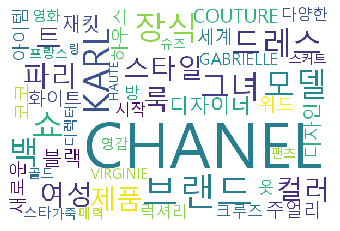

In [335]:
wc.generate_from_frequencies(dict(ADFN_rank[:50]))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('ch_ADFN_dropword50.png')

In [70]:
# wc.generate_from_frequencies(dict(noun_rank))

# plt.imshow(wc) 
# plt.axis('off') 
# plt.show()

# wc.to_file('twitter_noun_chanel.png')

NameError: name 'noun_rank' is not defined

### rank 보기

In [336]:
ch_ADFN_rank_df = pd.DataFrame(ADFN_rank)

In [337]:
ch_ADFN_rank_df.columns = ['word', 'count']

In [338]:
ch_ADFN_rank_df.loc[:50]

,word,count
0,CHANEL,5469
1,브랜드,921
2,KARL,882
3,쇼,735
4,모델,716
5,장식,702
6,백,665
7,그녀,640
8,드레스,634
9,파리,531


In [340]:
ch_ADFN_rank_df.to_csv('./magazine/final/ch_ADFN_rank_dropword.csv', sep='|', encoding='utf-8', index = False)

### 브랜드 특성 안나타내는 단어 drop

In [ ]:
add_top200 = ['있는', '소재', '가장', '지난', '같은', '위해', '방', '모든', '통해', '개', '드', 'DIOR', '생각', '내', '건', '두', 
              '구찌', '대한', '가지', '속', '곳']

In [ ]:
add_fashion = ['컬렉션', '패션', '브랜드', '쇼', '모델', '장식', '그녀', ]

In [339]:
ch_dwr.to_csv('./magazine/final/magazine_ch.csv', sep='|', encoding = 'utf-8', index = False)

In [ ]:
### 확인하기

In [143]:
for i in range(len(ADFN_df)):
    if '두' in ADFN_df.loc[i, 'noun']:
        print(i)

1
37
53
74
91
104
116
135
147
174
180
195
203
224
228
229
236
238
239
251
252
253
256
260
263
267
276
278
281
282
286
288
293
294
295
297
300
306
307
310
318
319
320
322
324
325
326
328
333
336
344
347
362
382
412
414
423
458
473
477
479
487
507
523
525
528
533
534
537
543
546
551
563
571
602
603
620
626
633
635
636
651
664
666
670
682
684
695
710
712
713
721
764
766
775
785
796
805
811
813
836
841
850
853
880
906
912
916
922
923
935
936
949
957
962
966
977
980
993
997
998
1002
1010
1019
1032
1033
1035
1038
1042
1044
1053
1057
1058
1061
1069
1071
1080
1081
1097
1098
1106
1114
1119
1124
1125
1129
1137
1148
1150
1152
1154
1164
1199
1215
1218
1219
1234
1249
1266
1270
1281
1292
1297
1302
1306
1313
1324
1342
1360
1371
1378
1380
1381
1400
1406
1416
1436
1439
1445
1447


In [146]:
ADFN_df.loc[477, 'noun']

['↑',
 '사진',
 '봄',
 '여름',
 'CHANEL',
 'HAUTE',
 'COUTURE',
 '컬렉션',
 '현지',
 '가을',
 '겨울',
 'HAUTE',
 'COUTURE',
 '컬렉션',
 'CHANEL',
 '스키아파렐리',
 '세기',
 '대결',
 '예고',
 '가운데',
 '몇몇',
 '주목할만한',
 '꾸띄르',
 '데뷔',
 '작',
 '기존',
 '레디',
 '투',
 '웨어',
 '컬렉션',
 '없는',
 '컨셉',
 '추얼',
 '패션쇼',
 'CHANEL',
 '스키아파렐리',
 '브랜드',
 '역사',
 '코코',
 'CHANEL',
 '엘사',
 '스키아파렐리',
 '전성기',
 '구가',
 '대에는',
 '서로',
 '라이벌',
 '구도',
 '그러한',
 '이유',
 '꾸띠르',
 'CHANEL',
 '스키아파렐리',
 '세기',
 '계속',
 '라이벌',
 '전이',
 '최대',
 '이슐',
 '↑',
 '사진',
 '봄',
 '여름',
 '스키아파렐리',
 'HAUTE',
 'COUTURE',
 '컬렉션',
 'CHANEL',
 'KARL',
 'LAGERFELD',
 'VIRGINIE',
 'VIARD',
 '데뷔',
 '무대',
 '스키',
 '아파',
 '펠리',
 '새로',
 '텍사스',
 '출신',
 '다니엘',
 '베리',
 '꾸띄르',
 '데뷔전',
 '공통점',
 '가지',
 '먼저',
 '현지',
 '월요일',
 '아침',
 '스키아파렐리',
 '크리에이티브',
 '디렉터',
 '다니엘',
 '베리',
 '데뷔',
 '쇼',
 '다니엘',
 '베리',
 '뉴욕',
 '컨셉',
 '추얼',
 '디자이너',
 '톰',
 '브라운',
 '여성',
 '남성',
 '컬렉션',
 '수장',
 '↑',
 '사진',
 'CHANEL',
 '크리에이티브',
 '디렉터',
 'VIRGINIE',
 'VIARD',
 '좌',
 '스키아파렐리',
 '크리에이티브',
 '디렉터',
 '다니엘',
 '베리',
 '기성

In [142]:
ch_dwr.loc[819, 'link']

'http://www.marieclairekorea.com/fashion/2020/03/%ec%83%a4%eb%84%ac-%ec%98%a4%ed%8a%b8-%ec%bf%a0%ed%8a%80%eb%a5%b4-2020-s-s-%eb%b2%a0%ec%8a%a4%ed%8a%b8-%eb%aa%a8%eb%a8%bc%ed%8a%b8/'

In [ ]:
## 사전에 등록했으면 하는 단어
['레디 투 웨어', '공방', '트위드', 'FW', 'F/W', 'SS', 'S/S', '오간자', '아름다움', '그랑 팔레', '캐주얼', '런웨이', 
 '오프숄더', '레이어드', '']